In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import  RBF


import Bgolearn.BGOsampling as BGOS 

 Bgolearn : A Bayesian global optimization package 
 10 Jul 2022, version 1, Bin Cao, MGI, SHU, Shanghai, CHINA.


In [2]:
def True_function(X):
    X = np.array(X)
    Y = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8
    return Y

In [3]:
def generate_function(data, obs):
    print('------------12 original data-----------')
    data = np.array(data)
    # for one feature dataset
    data_matrix = np.array(data[:,0]).reshape(-1, 1)

    Measured_response = np.zeros(len(data_matrix))
    for i in range(obs):
        Measured_response += np.array(data[:,i+1])
    # for one feature dataset
    Measured_response = Measured_response/obs
    
    Measured_std = []
    for j in range(len(data_matrix)):
        std = np.std(np.array(data[j,1:1+obs]))
        Measured_std.append(std)
    Measured_std = np.array(Measured_std)  
    print('evaluated mean of y :', Measured_response)
    print('evaluated std of y :', Measured_std)
    print('---------------------------------------\n')
    return data_matrix,Measured_response,Measured_std

## design virtual samples

In [4]:
virtual_samples = np.linspace(0,11,100)

## define a callable Kriging model and sampling function

In [5]:
def Sam_function(X,real_std,obs):
    print('--------------Draw samples-------------')
    print('real std of added datum:', real_std)
    X = np.array(X)
    Y = np.zeros(1)
    Y_list = []
    for i in range(obs):
        __sam = 0.013*X**4 - 0.25*X**3 + 1.61*X**2 - 4.1*X + 8 + np.random.normal(loc=0.0, scale=real_std, size=None)
        Y_list.append(__sam)
        Y += __sam
        print(i+1,'-th sampling, result = ', __sam)
    cal_std = np.std(np.array(Y_list))
    print('evaluated mean of added datum:', Y/obs)
    print('evaluated std of added datum:', cal_std)
    print('---------------------------------------\n')
    return Y/obs, np.array(cal_std)


## instantiate Bgolearn

In [6]:
Bgolearn = BGOS.Bgolearn()
method_name = 'AEI'


------------12 original data-----------
evaluated mean of y : [6.21494888 5.56581958 4.61988109 4.34056442 4.35646479 4.67190767
 4.62173112 4.55605355 4.70138419 4.48867457 5.8769712  7.75473896]
evaluated std of y : [0.30008321 0.2742029  0.07394358 0.91538122 0.33136727 0.29720623
 0.07801782 0.48293232 0.24548787 0.12272781 0.21645983 0.25832216]
---------------------------------------

current optimal is : 4.251646319418976
The next datum recomended by Augmented_EI : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  3.2227634008626223
2 -th sampling, result =  3.350988640472939
3 -th sampling, result =  4.484508422886693
evaluated mean of added datum: [3.68608682]
evaluated std of added datum: 0.5669910159781064
---------------------------------------

1-th iteration 
 new added datum: [8.2, array([3.6861])]


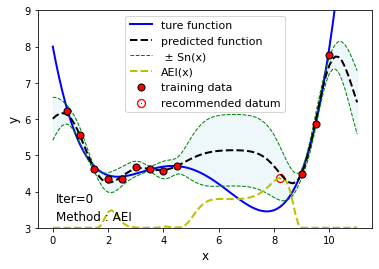

current optimal is : 3.904853461424702
The next datum recomended by Augmented_EI : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.695790834296451
2 -th sampling, result =  3.6743460725701964
3 -th sampling, result =  3.6343870092882606
evaluated mean of added datum: [3.66817464]
evaluated std of added datum: 0.02544500446388047
---------------------------------------

2-th iteration 
 new added datum: [8.1, array([3.6682])]


<Figure size 432x288 with 0 Axes>

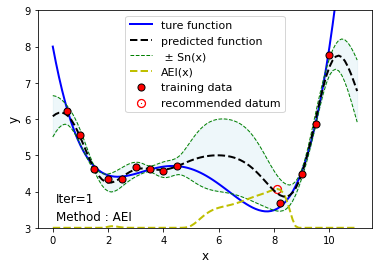

current optimal is : 3.6688689292794425
The next datum recomended by Augmented_EI : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  4.084056444400828
2 -th sampling, result =  3.325739579935504
3 -th sampling, result =  3.645064443692942
evaluated mean of added datum: [3.68495349]
evaluated std of added datum: 0.31086381659851176
---------------------------------------

3-th iteration 
 new added datum: [7.0, array([3.685])]


<Figure size 432x288 with 0 Axes>

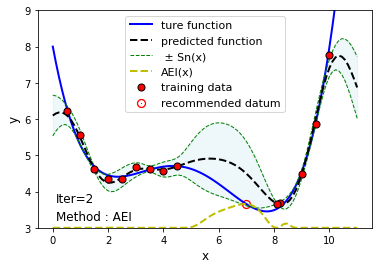

current optimal is : 3.6682974240979127
The next datum recomended by Augmented_EI : 
 x =  [6.11111111]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.716474008051628
2 -th sampling, result =  4.0671557032748655
3 -th sampling, result =  4.000982154278047
evaluated mean of added datum: [3.92820396]
evaluated std of added datum: 0.15213352147982495
---------------------------------------

4-th iteration 
 new added datum: [6.1, array([3.9282])]


<Figure size 432x288 with 0 Axes>

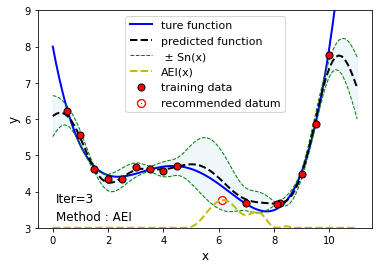

current optimal is : 3.668278516567576
The next datum recomended by Augmented_EI : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  3.1018464473846246
2 -th sampling, result =  3.5680569875709267
3 -th sampling, result =  5.2172527096032155
evaluated mean of added datum: [3.96238538]
evaluated std of added datum: 0.9075083379833694
---------------------------------------

5-th iteration 
 new added datum: [7.0, array([3.9624])]


<Figure size 432x288 with 0 Axes>

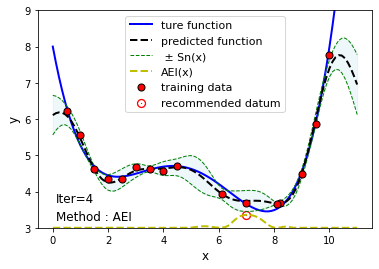

current optimal is : 3.6683156211099375
The next datum recomended by Augmented_EI : 
 x =  [7.]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.8142922162902364
2 -th sampling, result =  3.6492956636459852
3 -th sampling, result =  3.699590685323417
evaluated mean of added datum: [3.72105952]
evaluated std of added datum: 0.06904901061013975
---------------------------------------

6-th iteration 
 new added datum: [7.0, array([3.7211])]


<Figure size 432x288 with 0 Axes>

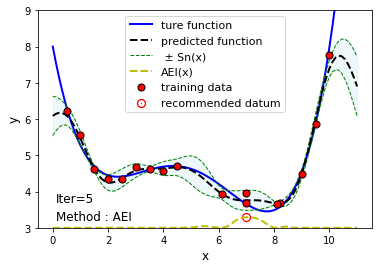

current optimal is : 3.6682263580977
The next datum recomended by Augmented_EI : 
 x =  [7.55555556]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  3.94058374776524
2 -th sampling, result =  3.1209169392727567
3 -th sampling, result =  3.0064129421007832
evaluated mean of added datum: [3.35597121]
evaluated std of added datum: 0.4160181535126126
---------------------------------------

7-th iteration 
 new added datum: [7.6, array([3.356])]


<Figure size 432x288 with 0 Axes>

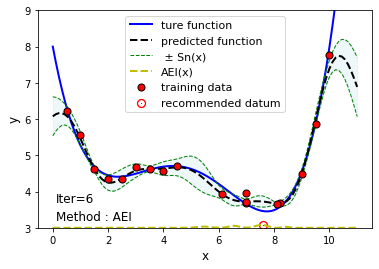

<Figure size 432x288 with 0 Axes>

In [17]:
obs = 3

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Augmented_EI(alpha = 1, tao = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.29185161 5.39856881 4.62623151 4.38385368 4.46148423 4.63694734
 4.5905237  4.59016103 4.67177078 4.4811777  5.95522378 7.80150911]
evaluated std of y : [0.29202661 0.37457828 0.06497479 0.79628133 0.33976528 0.26441507
 0.08652626 0.42238334 0.21869861 0.10707566 0.23132562 0.23792876]
---------------------------------------

current optimal is : 4.494304200274712
The next datum recomended by Augmented_EI : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.2624647212511846
2 -th sampling, result =  3.6245865814802114
3 -th sampling, result =  3.4355415507617137
4 -th sampling, result =  3.8398044647928016
evaluated mean of added datum: [3.54059933]
evaluated std of added datum: 0.21504276822292578
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.5406])]


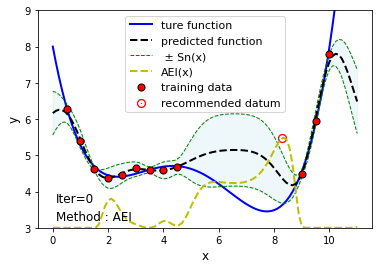

current optimal is : 3.5921140792903397
The next datum recomended by Augmented_EI : 
 x =  [7.44444444]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.70001666260562
2 -th sampling, result =  3.791316544356628
3 -th sampling, result =  3.624304625824839
4 -th sampling, result =  3.587738699062649
evaluated mean of added datum: [3.67584413]
evaluated std of added datum: 0.07800172636101757
---------------------------------------

2-th iteration 
 new added datum: [7.4, array([3.6758])]


<Figure size 432x288 with 0 Axes>

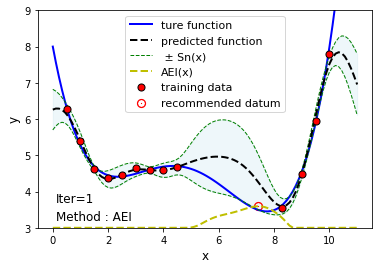

current optimal is : 3.5313018979153625
The next datum recomended by Augmented_EI : 
 x =  [6.33333333]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.810982836500574
2 -th sampling, result =  4.071408516391627
3 -th sampling, result =  4.144343787055401
4 -th sampling, result =  4.626517945988321
evaluated mean of added datum: [4.16331327]
evaluated std of added datum: 0.29474634486552176
---------------------------------------

3-th iteration 
 new added datum: [6.3, array([4.1633])]


<Figure size 432x288 with 0 Axes>

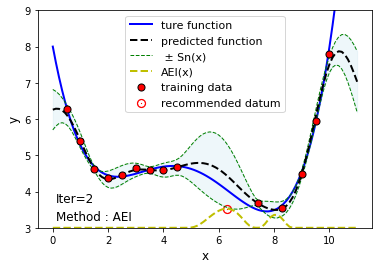

current optimal is : 3.5321769695396337
The next datum recomended by Augmented_EI : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.4674493507731987
2 -th sampling, result =  3.596626173943847
3 -th sampling, result =  4.466405156031484
4 -th sampling, result =  3.39750198836581
evaluated mean of added datum: [3.73199567]
evaluated std of added datum: 0.4299863287667319
---------------------------------------

4-th iteration 
 new added datum: [8.1, array([3.732])]


<Figure size 432x288 with 0 Axes>

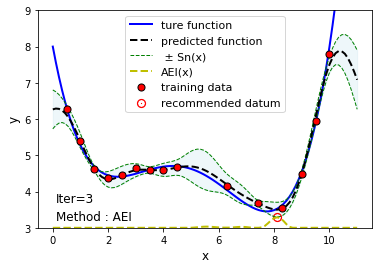

current optimal is : 3.542528539722394
The next datum recomended by Augmented_EI : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.5
1 -th sampling, result =  3.7903225198204202
2 -th sampling, result =  3.164710001828924
3 -th sampling, result =  3.6298863759416546
4 -th sampling, result =  3.0214750167942475
evaluated mean of added datum: [3.40159848]
evaluated std of added datum: 0.31773878459259536
---------------------------------------

5-th iteration 
 new added datum: [8.1, array([3.4016])]


<Figure size 432x288 with 0 Axes>

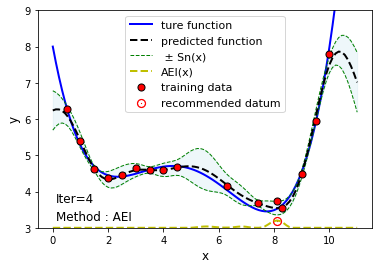

current optimal is : 3.5029262819996383
The next datum recomended by Augmented_EI : 
 x =  [8.11111111]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.578736728524992
2 -th sampling, result =  3.787365020323216
3 -th sampling, result =  3.5227812210111145
4 -th sampling, result =  3.598321057840081
evaluated mean of added datum: [3.62180101]
evaluated std of added datum: 0.09952663037863298
---------------------------------------

6-th iteration 
 new added datum: [8.1, array([3.6218])]


<Figure size 432x288 with 0 Axes>

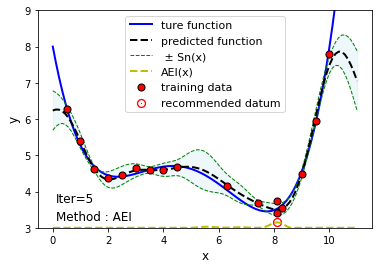

current optimal is : 3.58794900858457
The next datum recomended by Augmented_EI : 
 x =  [6.77777778]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.7202988978540135
2 -th sampling, result =  3.177177675631854
3 -th sampling, result =  3.824632975703783
4 -th sampling, result =  3.5454539185379415
evaluated mean of added datum: [3.56689087]
evaluated std of added datum: 0.246120363244942
---------------------------------------

7-th iteration 
 new added datum: [6.8, array([3.5669])]


<Figure size 432x288 with 0 Axes>

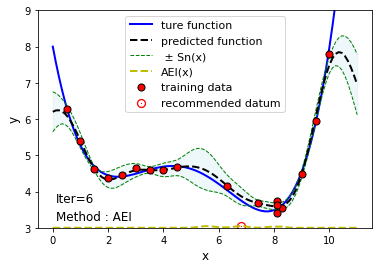

current optimal is : 3.598793903973915
The next datum recomended by Augmented_EI : 
 x =  [6.77777778]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.7551569034625025
2 -th sampling, result =  3.525045162956535
3 -th sampling, result =  3.7195196805655697
4 -th sampling, result =  3.8823865271275197
evaluated mean of added datum: [3.72052707]
evaluated std of added datum: 0.12807409968654726
---------------------------------------

8-th iteration 
 new added datum: [6.8, array([3.7205])]


<Figure size 432x288 with 0 Axes>

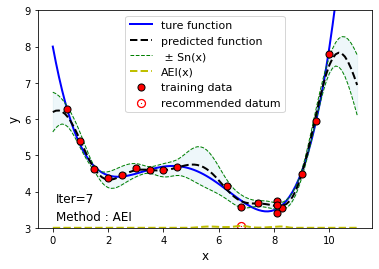

current optimal is : 3.5989708409715995
The next datum recomended by Augmented_EI : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.059714558750455
2 -th sampling, result =  3.531388962745722
3 -th sampling, result =  3.8249009860263663
4 -th sampling, result =  3.3439390645441764
evaluated mean of added datum: [3.43998589]
evaluated std of added datum: 0.27854327801384354
---------------------------------------

9-th iteration 
 new added datum: [8.2, array([3.44])]


<Figure size 432x288 with 0 Axes>

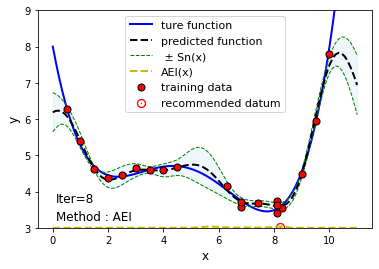

current optimal is : 3.5821960264259287
The next datum recomended by Augmented_EI : 
 x =  [8.22222222]
--------------Draw samples-------------
real std of added datum: 0.2
1 -th sampling, result =  3.7964118146039887
2 -th sampling, result =  3.7808906434926155
3 -th sampling, result =  3.618431675349848
4 -th sampling, result =  3.7131002480628434
evaluated mean of added datum: [3.7272086]
evaluated std of added datum: 0.07018246154808934
---------------------------------------

10-th iteration 
 new added datum: [8.2, array([3.7272])]


<Figure size 432x288 with 0 Axes>

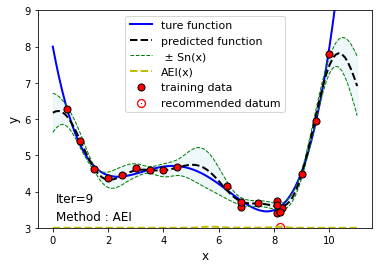

current optimal is : 3.6640398447261946
The next datum recomended by Augmented_EI : 
 x =  [5.66666667]
--------------Draw samples-------------
real std of added datum: 0.6
1 -th sampling, result =  4.749813056044006
2 -th sampling, result =  3.856718148776448
3 -th sampling, result =  4.234979283117522
4 -th sampling, result =  3.4140609481785646
evaluated mean of added datum: [4.06389286]
evaluated std of added datum: 0.49116187609286716
---------------------------------------

11-th iteration 
 new added datum: [5.7, array([4.0639])]


<Figure size 432x288 with 0 Axes>

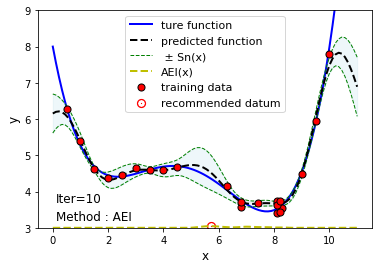

Searching is defeated


<Figure size 432x288 with 0 Axes>

In [18]:
obs = 4

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Augmented_EI(alpha = 1, tao = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break

------------12 original data-----------
evaluated mean of y : [6.38302126 5.47159103 4.62333861 4.45561327 4.45288222 4.66633633
 4.60958967 4.62022357 4.74050698 4.45448135 5.94232697 7.79008494]
evaluated std of y : [0.31854553 0.36548063 0.05840252 0.72653212 0.30438189 0.24369472
 0.0862756  0.38254565 0.23908561 0.10964916 0.20850551 0.21403299]
---------------------------------------

current optimal is : 4.467845959876527
The next datum recomended by Augmented_EI : 
 x =  [8.33333333]
--------------Draw samples-------------
real std of added datum: 0.3
1 -th sampling, result =  3.6207117462299525
2 -th sampling, result =  3.772991671978711
3 -th sampling, result =  3.6865727803251027
4 -th sampling, result =  3.9421494500943512
5 -th sampling, result =  4.005845998125246
evaluated mean of added datum: [3.80565433]
evaluated std of added datum: 0.14707728974241527
---------------------------------------

1-th iteration 
 new added datum: [8.3, array([3.8057])]


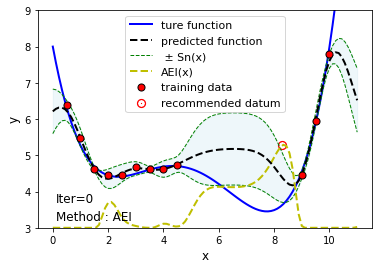

current optimal is : 3.821390337282657
The next datum recomended by Augmented_EI : 
 x =  [7.11111111]
--------------Draw samples-------------
real std of added datum: 0.4
1 -th sampling, result =  4.061328833078493
2 -th sampling, result =  3.915717423024307
3 -th sampling, result =  4.031286491738643
4 -th sampling, result =  3.5785813902454118
5 -th sampling, result =  3.4996440622294878
evaluated mean of added datum: [3.81731164]
evaluated std of added datum: 0.2336313968376598
---------------------------------------

2-th iteration 
 new added datum: [7.1, array([3.8173])]


<Figure size 432x288 with 0 Axes>

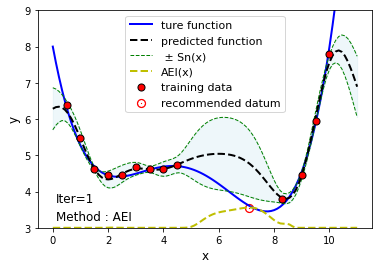

current optimal is : 3.80378813759285
The next datum recomended by Augmented_EI : 
 x =  [6.22222222]
--------------Draw samples-------------
real std of added datum: 0.1
1 -th sampling, result =  4.082899830827286
2 -th sampling, result =  4.187005805100815
3 -th sampling, result =  4.055236144572951
4 -th sampling, result =  4.318342274492774
5 -th sampling, result =  4.160643857358332
evaluated mean of added datum: [4.16082558]
evaluated std of added datum: 0.09243213457592477
---------------------------------------

3-th iteration 
 new added datum: [6.2, array([4.1608])]


<Figure size 432x288 with 0 Axes>

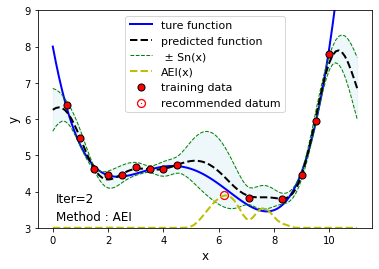

current optimal is : 3.8015367344245417
The next datum recomended by Augmented_EI : 
 x =  [7.66666667]
--------------Draw samples-------------
real std of added datum: 0.7
1 -th sampling, result =  4.079277365781185
2 -th sampling, result =  3.2405610198784838
3 -th sampling, result =  2.2798330435151826
4 -th sampling, result =  3.2558158222844003
5 -th sampling, result =  3.3422035335107005
evaluated mean of added datum: [3.23953816]
evaluated std of added datum: 0.5721891351263182
---------------------------------------

4-th iteration 
 new added datum: [7.7, array([3.2395])]


<Figure size 432x288 with 0 Axes>

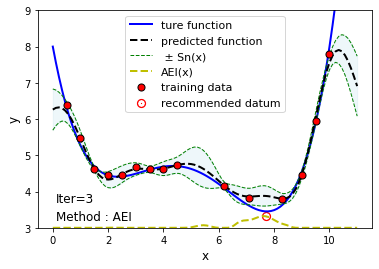

<Figure size 432x288 with 0 Axes>

In [7]:
obs = 5

data = pd.read_csv('data.csv')
data_matrix, Measured_response,Measured_std = generate_function(data,obs)
for i in range(500):
    plt.figure()
    ax1 = plt.subplot()
    ax1.set_ylim([3, 9])
    
   
    class Kriging_model(object):
        def fit_pre(self,xtrain,ytrain,xtest):
            # instantiated model
            kernel = RBF() 
            mdoel = GaussianProcessRegressor(kernel=kernel,normalize_y=True,alpha = Measured_std**2).fit(xtrain,ytrain)
            # defined the attribute's outputs
            mean,std = mdoel.predict(xtest,return_std=True)
            return mean,std  
    

    y_mean_pre,y_mean_std = Kriging_model().fit_pre(data_matrix, Measured_response, virtual_samples.reshape(-1,1))
    ax1.scatter(data_matrix,Measured_response,c='r',s=50,zorder=10,edgecolors=(0,0,0),label="training data")
    ax1.plot(virtual_samples,True_function(virtual_samples),'b',lw=2,label="ture function")
    ax1.plot(virtual_samples,y_mean_pre,'k--',lw=2,zorder=9,label="predicted function")
    ax1.fill_between(virtual_samples,y_mean_pre-y_mean_std,y_mean_pre+y_mean_std,alpha=0.2,color='lightblue')
    ax1.plot(virtual_samples,y_mean_pre-y_mean_std,'g--',lw=1,label=' ± Sn(x)') 
    ax1.plot(virtual_samples,y_mean_pre+y_mean_std,'g--',lw=1)

    
    Bgolearn = BGOS.Bgolearn()
    # min_search = False:  searching the global maximum
    model = Bgolearn.fit(Kriging_model,data_matrix,Measured_response,virtual_samples,opt_num = 1,min_search = True)
    # recall the utility function 
    _return = model.Augmented_EI(alpha = 1, tao = 0.2)*10 + 3
    
    
    index = np.random.choice(np.flatnonzero(_return == _return.max()))
    recommend = virtual_samples[index]
    ax1.plot(virtual_samples,_return,'y--',lw=2,label='{name}(x)'.format(name = method_name))
    
    # give an intrinsic std to recommended datum
    sam_std = round(random.uniform(0.1,0.7),1)
    datum_y, datum_std = Sam_function(round(recommend,1),sam_std,obs)
    Measured_std = np.append(Measured_std,datum_std)
    data_matrix = np.append(data_matrix,np.round(recommend,1)).reshape(-1,1)
    Measured_response = np.append(Measured_response,np.round(datum_y,4))

    print("{num}-th iteration".format(num = i + 1),'\n', 'new added datum:',([np.round(recommend,1),np.round(datum_y,4)]))
    ax1.scatter(round(recommend,1),_return[index],c='red',s=1.5,linewidths=8,label="recommended datum") 
    
    
    plt.text(0.1,3.2,'Method : {name}'.format(name = method_name),fontsize=12,color='k')
    plt.text(0.1,3.7,'Iter={}'.format(i),fontsize=12,color='k')
    plt.xlabel('x',fontsize = 12)
    plt.ylabel('y',fontsize = 12)
    plt.legend(fontsize = 11)
    plt.savefig('{name}-obs_{obstime}-{num}.png'.format(name = method_name,obstime = obs,num = i),dpi=800)
    plt.show()
    plt.clf()
    if 7.6 <= round(recommend,1) <= 7.8:
        break
    elif i>=10:
        print('Searching is defeated')
        break